In [69]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
iris = load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [13]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [16]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
X = df.drop('target',axis='columns')
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [27]:
y = iris.target

In [59]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
Rmodel = RandomForestClassifier(n_estimators=40)
Rmodel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

In [65]:
Rmodel.score(X_test, y_test)

0.9333333333333333

In [68]:
y_predicted = Rmodel.predict(X_test)

In [72]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 7,  0,  0],
       [ 0,  7,  2],
       [ 0,  0, 14]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

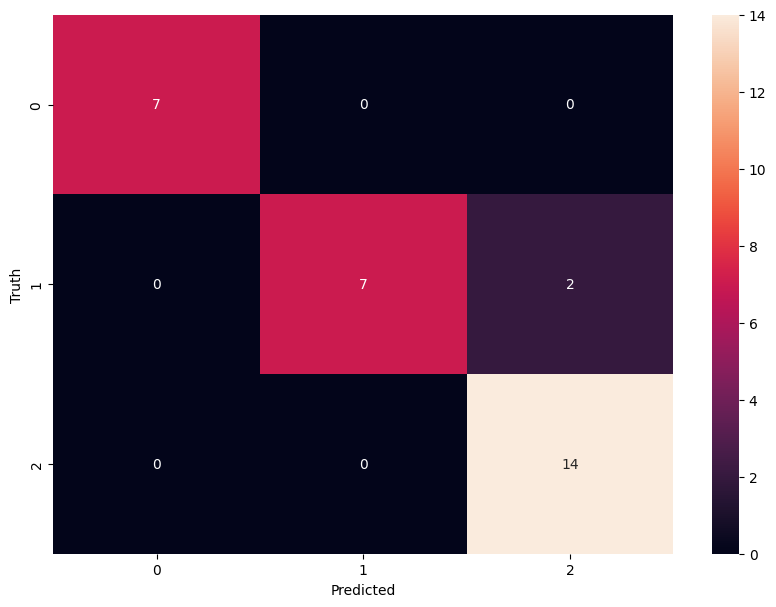

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')